In [37]:
import numpy as np
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

In [10]:
url = 'http://apdrc.soest.hawaii.edu:80/dods/public_data/Argo_Products/monthly_mean/Gridded_monthly_mean'
ds = xr.open_dataset(url)
ds

<xarray.Dataset>
Dimensions:  (lat: 180, lev: 27, lon: 360, time: 180)
Coordinates:
  * time     (time) datetime64[ns] 2005-01-15 2005-02-15 ... 2019-12-15
  * lev      (lev) float64 0.0 5.0 10.0 20.0 ... 1.4e+03 1.5e+03 1.75e+03 2e+03
  * lat      (lat) float64 -89.5 -88.5 -87.5 -86.5 -85.5 ... 86.5 87.5 88.5 89.5
  * lon      (lon) float64 0.5 1.5 2.5 3.5 4.5 ... 355.5 356.5 357.5 358.5 359.5
Data variables:
    temp     (time, lev, lat, lon) float32 ...
    salt     (time, lev, lat, lon) float32 ...
    ptemp    (time, lev, lat, lon) float32 ...
    pden     (time, lev, lat, lon) float32 ...
    addep    (time, lev, lat, lon) float32 ...
    spice    (time, lev, lat, lon) float32 ...
Attributes:
    title:          1x1 gridded Monthly mean on Standard Levels (from 2005)
    Conventions:    COARDS\nGrADS
    dataType:       Grid
    documentation:  http://apdrc.soest.hawaii.edu/projects/Argo/index.html
    history:        Fri Jul 19 13:26:16 HST 2019 : imported by GrADS Data Ser...

In [71]:
# %load isopy.py
import numpy as np
import xarray as xr
from scipy import interpolate

def compute_iso(data, iso, lev, d_or_t):

    """ compute the depth of some isopycnal/isotherm.
    
    Parameters:
    ----------------
    
    data: the input variable (Temperature, Density),
        array_like (3D), shape (N, M, L).
    iso: the objective isosurface layer,
        float.
    lev: the vertical depth,
        array_like (1D), shape (N).
    d_or_t: input d or t for density or temperature (lowercase)
        string
        
    Returns:
    ----------------
    
    var_iso: the output variable,
        array_like (2D), shape (M, L).
        
    """
    size = data.shape
    L = size[2]
    M = size[1]
    N = size[0] #this should be the same length as lev
    
    #check that the input data is in the for depth lat lon (or depth lon lat)
    if len(lev) != N:
        print('Error: either data input variable does not have depth as dimension 0, or lev variable is not same length as depth')
    else:
#         if d_or_t is ('d' or 't'):
        if d_or_t in {'d','t'} :
            var_iso = np.zeros((M, L)) # define the output var
            var_iso[:, :] = np.nan # NaN fill to avoid any later computation errors with zeros

            for i in np.arange(L): #loop through dimension 1
                for j in np.arange(M): #loop through dimension 2

                    data_prof = data[:, j, i] #select one profile
                    if d_or_t == 'd':
                        id1 = np.where(data_prof < iso)
                        if np.size(id1) > 0 and np.size(id1) < len(z):
                            var1 = data_prof[id1[0][-1]]
                            var2 = data_prof[id1[0][-1] + 1]
                            if var1 < var2:
                                func = interpolate.interp1d([var1, var2], [lev[id1[0][-1]], lev[id1[0][-1] + 1]])
                                var_iso[j, i] = func(iso)

                    else:
                        id1 = np.where(data_prof > iso)

                        if np.size(id1) > 0 and np.size(id1) < len(z):

                            var1 = data_prof[id1[0][-1]]
                            var2 = data_prof[id1[0][-1] + 1]

                            if var1 > var2:
                                func = interpolate.interp1d([var1, var2], [lev[id1[0][-1]], lev[id1[0][-1] + 1]])
                                var_iso[j, i] = func(iso)

        else:
            print('Is this density or temperature?')
    return var_iso


def iso_average(data, iso, lev):
    
    """ compute vertical average above the objective isopycnal layer
    
    Parameters:
    ----------------
    
    data: the input variable (Temperature, Salinity, Density ...),
        array_like (3D), shape (N, M, L).
    iso: the objective isopycnal layer,
        float.
    lev: the vertical depth,
        array_like (1D), shape (N)
        
    Returns:
    ----------------
    
    var_ave: the output variable,
        array_like (2D), shape (M, L).
    
    """
    
    return var_ave

In [72]:
%%time

pden = ds.pden #.chunk(chunks={'lat' : 30, 'lon' : 30})
temp = ds.temp
z = pden.lev.values
iso = [24]

#for t in np.arange(size[0]):
for t in np.arange(1):
#     # isopycnal
#     data = pden[90, :, :].values
#     dep_iso = compute_iso(data, iso, z, 'd')
    
    # isothermal
    data = temp[90, :, :].values
    temp_iso = compute_iso(data, iso, z, 't')

#ds_dep_iso = xr.DataArray(dep_iso, coords={'time': pden.time, 'lat': pden.lat, 'lon': pden.lon}, dims=['time', 'lat', 'lon'])


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:57: RuntimeWarning: invalid value encountered in greater


CPU times: user 2.09 s, sys: 54 ms, total: 2.15 s
Wall time: 5.51 s


In [58]:
dep_iso.shape

(180, 360)

### Plot in Cartopy

In [48]:
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [49]:
def make_map(projection=ccrs.PlateCarree(), figsize=(10, 10)):
    fig, ax = plt.subplots(
        figsize=figsize,
        subplot_kw={"projection": projection})
    return fig, ax

/srv/conda/envs/notebook/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:1366: UserWarning: The following kwargs were not used by contour: 'trans'
  result = matplotlib.axes.Axes.contour(self, *args, **kwargs)


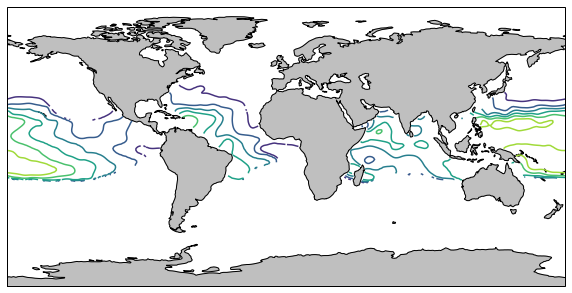

In [76]:
fig, ax = make_map(projection=ccrs.PlateCarree(), figsize=(10,10))
ax.set_global()
ax.coastlines(resolution="110m", color="k")
ax.add_feature(cfeature.LAND, facecolor="0.75")

lon, lat = ds.lon.values,ds.lat.values
lons, lats = np.meshgrid(lon, lat)
ax.contour(lons,lats,temp_iso,trans=ccrs.PlateCarree())


In [74]:
import hvplot

In [75]:
hvplot(temp_iso)


TypeError: 'module' object is not callable